In [ ]:
"""
To do'sy:
- połączenie sezonów 23/24, preprocessing i wydzielenie go jako zbiór testowy
- przepisanie modeli
"""

# Imports and configs

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [143]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data/all_games.csv')

Undermentioned method overwrites every csv with league name column so it will be much easier for me later on to fill empties while grouping tables.

In [144]:
data_folder = './data'

for entry in os.listdir(data_folder):
    entry_path = os.path.join(data_folder, entry)
    if os.path.isdir(entry_path):
        for file_name in os.listdir(entry_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(entry_path, file_name)
                df = pd.read_csv(file_path)
                df['league'] = entry
                df.to_csv(file_path, index=False)

In [148]:
data = pd.DataFrame()

for folder in os.listdir('./data'):
    if folder.endswith('csv'):
        continue
    for file in os.listdir(f'./data/{folder}'):
        df = pd.read_csv(f'./data/{folder}/{file}')
        data = pd.concat([data, df], ignore_index=True)

In [151]:
data.shape

(60364, 67)

In [150]:
data['league'].unique()

array(['bundesliga', 'czech first league', 'ekstraklasa',
       'epl championship', 'eredivisie', 'la liga', 'liga nos', 'ligue 1',
       'premier league', 'scottish', 'serie a', 'turkish super lig'],
      dtype=object)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60364 entries, 0 to 60363
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            60364 non-null  int64  
 1   date_GMT                             60364 non-null  object 
 2   status                               60364 non-null  object 
 3   attendance                           39074 non-null  float64
 4   home_team_name                       60364 non-null  object 
 5   away_team_name                       60364 non-null  object 
 6   referee                              37807 non-null  object 
 7   Game Week                            58878 non-null  float64
 8   Pre-Match PPG (Home)                 60364 non-null  float64
 9   Pre-Match PPG (Away)                 60364 non-null  float64
 10  home_ppg                             60364 non-null  float64
 11  away_ppg                    

In [48]:
data.to_csv('./data/all_games.csv')

In [49]:
data = pd.read_csv('./data/all_games.csv')

# Basic data glimpse

In [50]:
data.shape

(56249, 68)

In [51]:
data.head()

,Unnamed: 0,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league
0,0,1249669800,Aug 07 2009 - 6:30pm,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.0,0.0,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg),bundesliga
1,1,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.0,0.0,0.0,2.00,1.35,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund),bundesliga
2,2,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.0,0.0,0.0,1.12,1.76,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max-Morlock-Stadion (Nürnberg),bundesliga
3,3,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.0,0.0,0.0,1.76,1.18,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wohninvest WESERSTADION (Bremen),bundesliga
4,4,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.0,0.0,0.0,0.53,0.82,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olympiastadion Berlin (Berlin),bundesliga


In [53]:
data.isna().sum()

Unnamed: 0                                 0
timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             17725
home_team_name                             0
away_team_name                             0
referee                                22289
Game Week                               1471
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 13155
away_team_goal_timings                 18427
home_team_corner_count                     0
away_team_

In [54]:
data.dtypes

Unnamed: 0                               int64
timestamp                                int64
date_GMT                                object
status                                  object
attendance                             float64
home_team_name                          object
away_team_name                          object
referee                                 object
Game Week                              float64
Pre-Match PPG (Home)                   float64
Pre-Match PPG (Away)                   float64
home_ppg                               float64
away_ppg                               float64
home_team_goal_count                     int64
away_team_goal_count                     int64
total_goal_count                         int64
total_goals_at_half_time                 int64
home_team_goal_count_half_time           int64
away_team_goal_count_half_time           int64
home_team_goal_timings                  object
away_team_goal_timings                  object
home_team_cor

## Missingno matrix

The missingno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<Axes: >

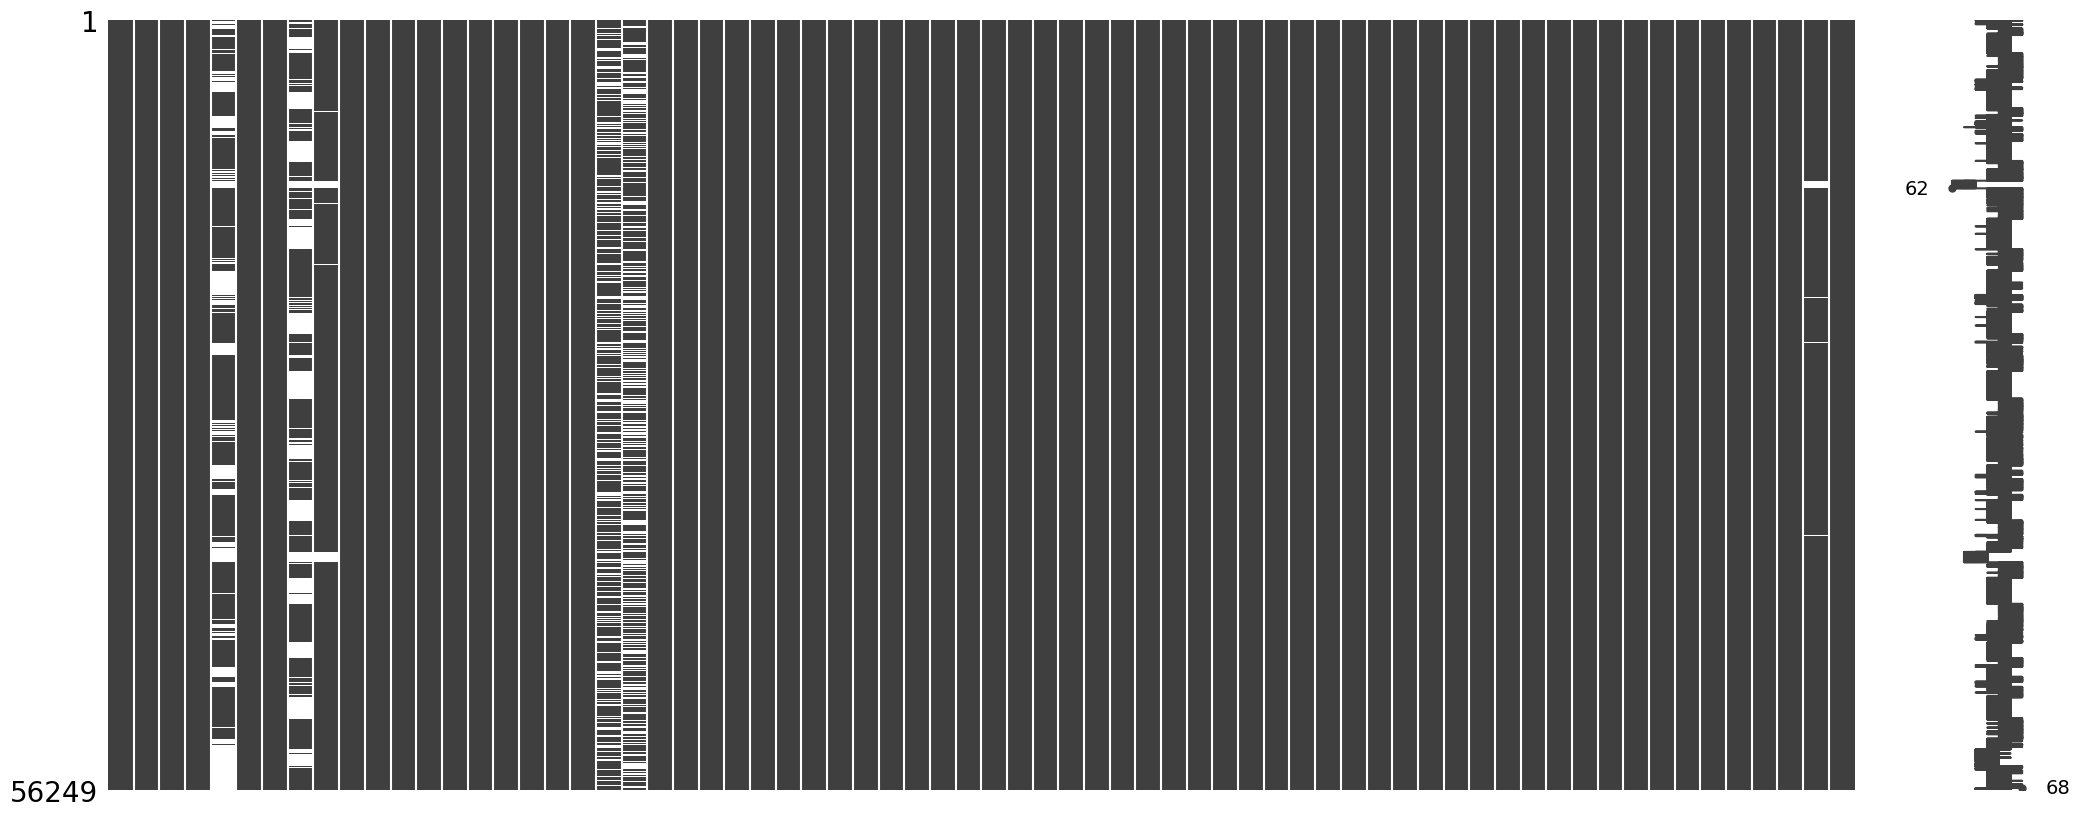

In [55]:
missingno.matrix(data)

## Missingno correlation matrix
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

<Axes: >

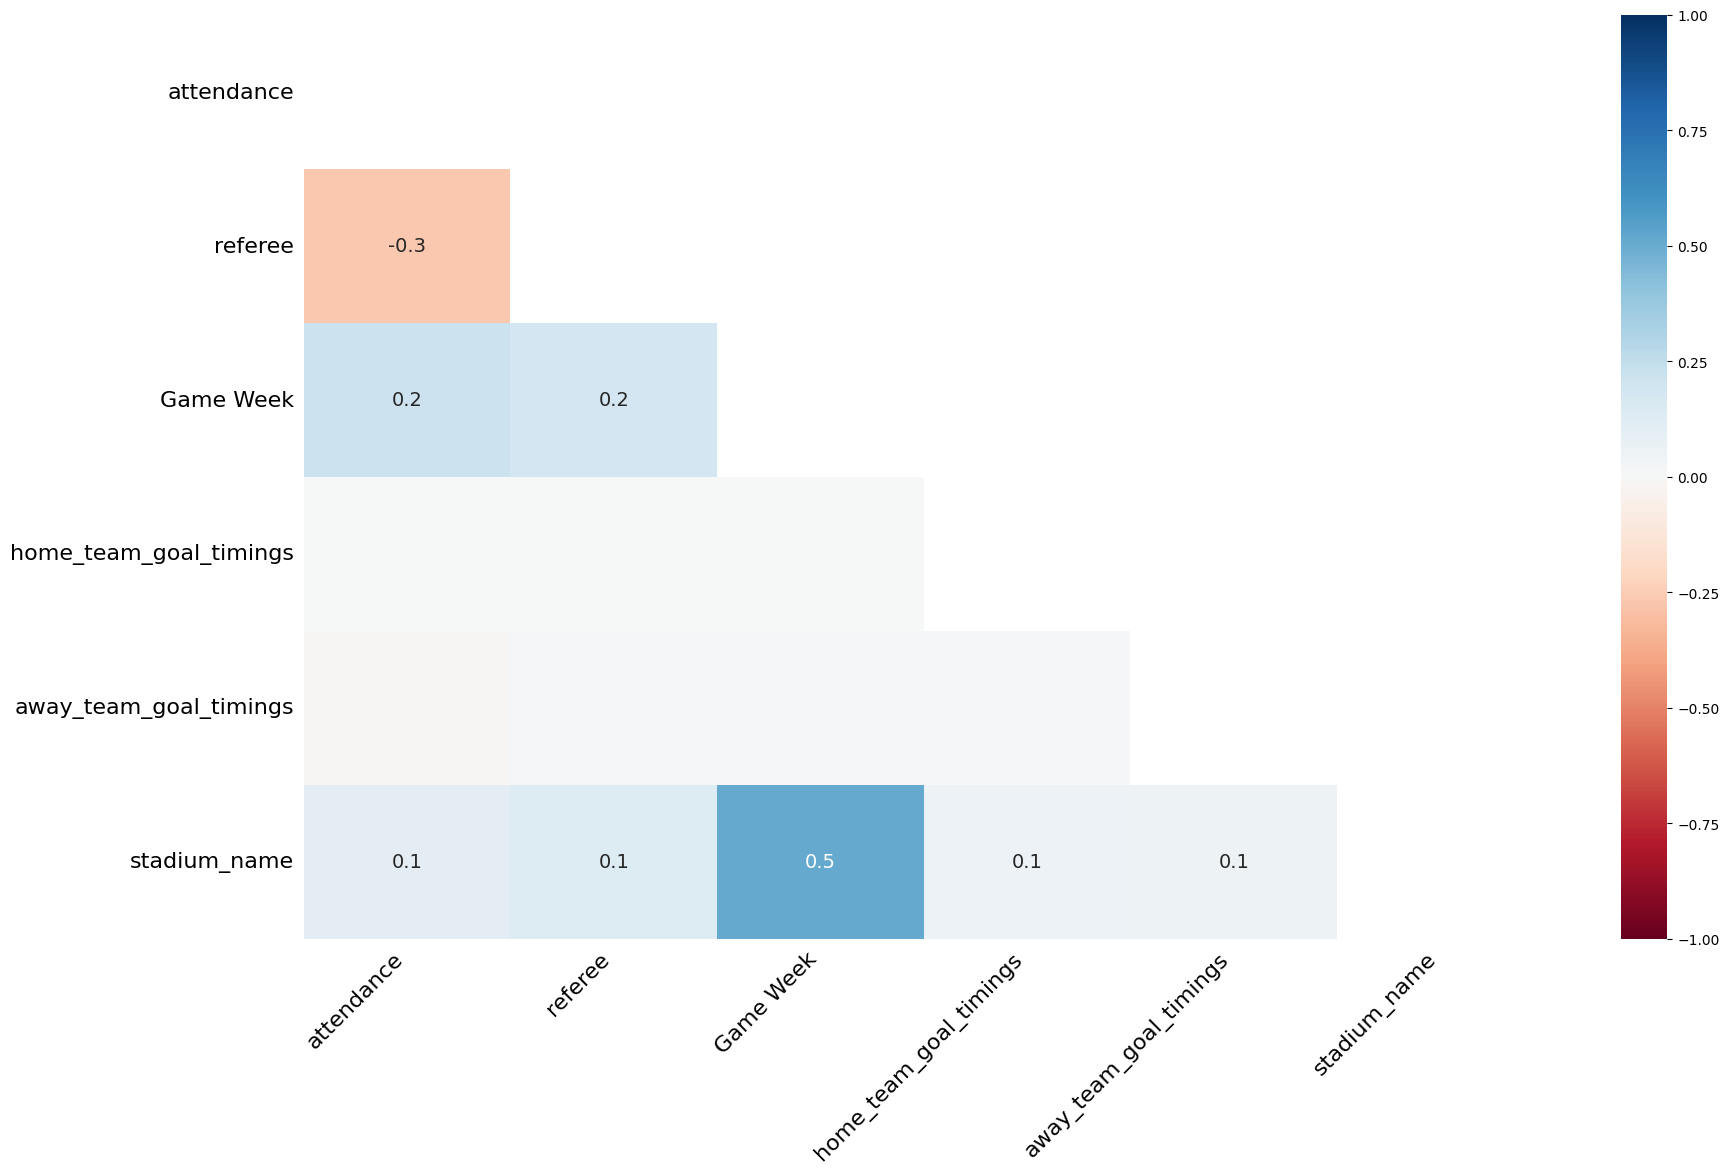

In [56]:
missingno.heatmap(data)

## Missingno dendrogram

The dendrogram allows to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

<Axes: >

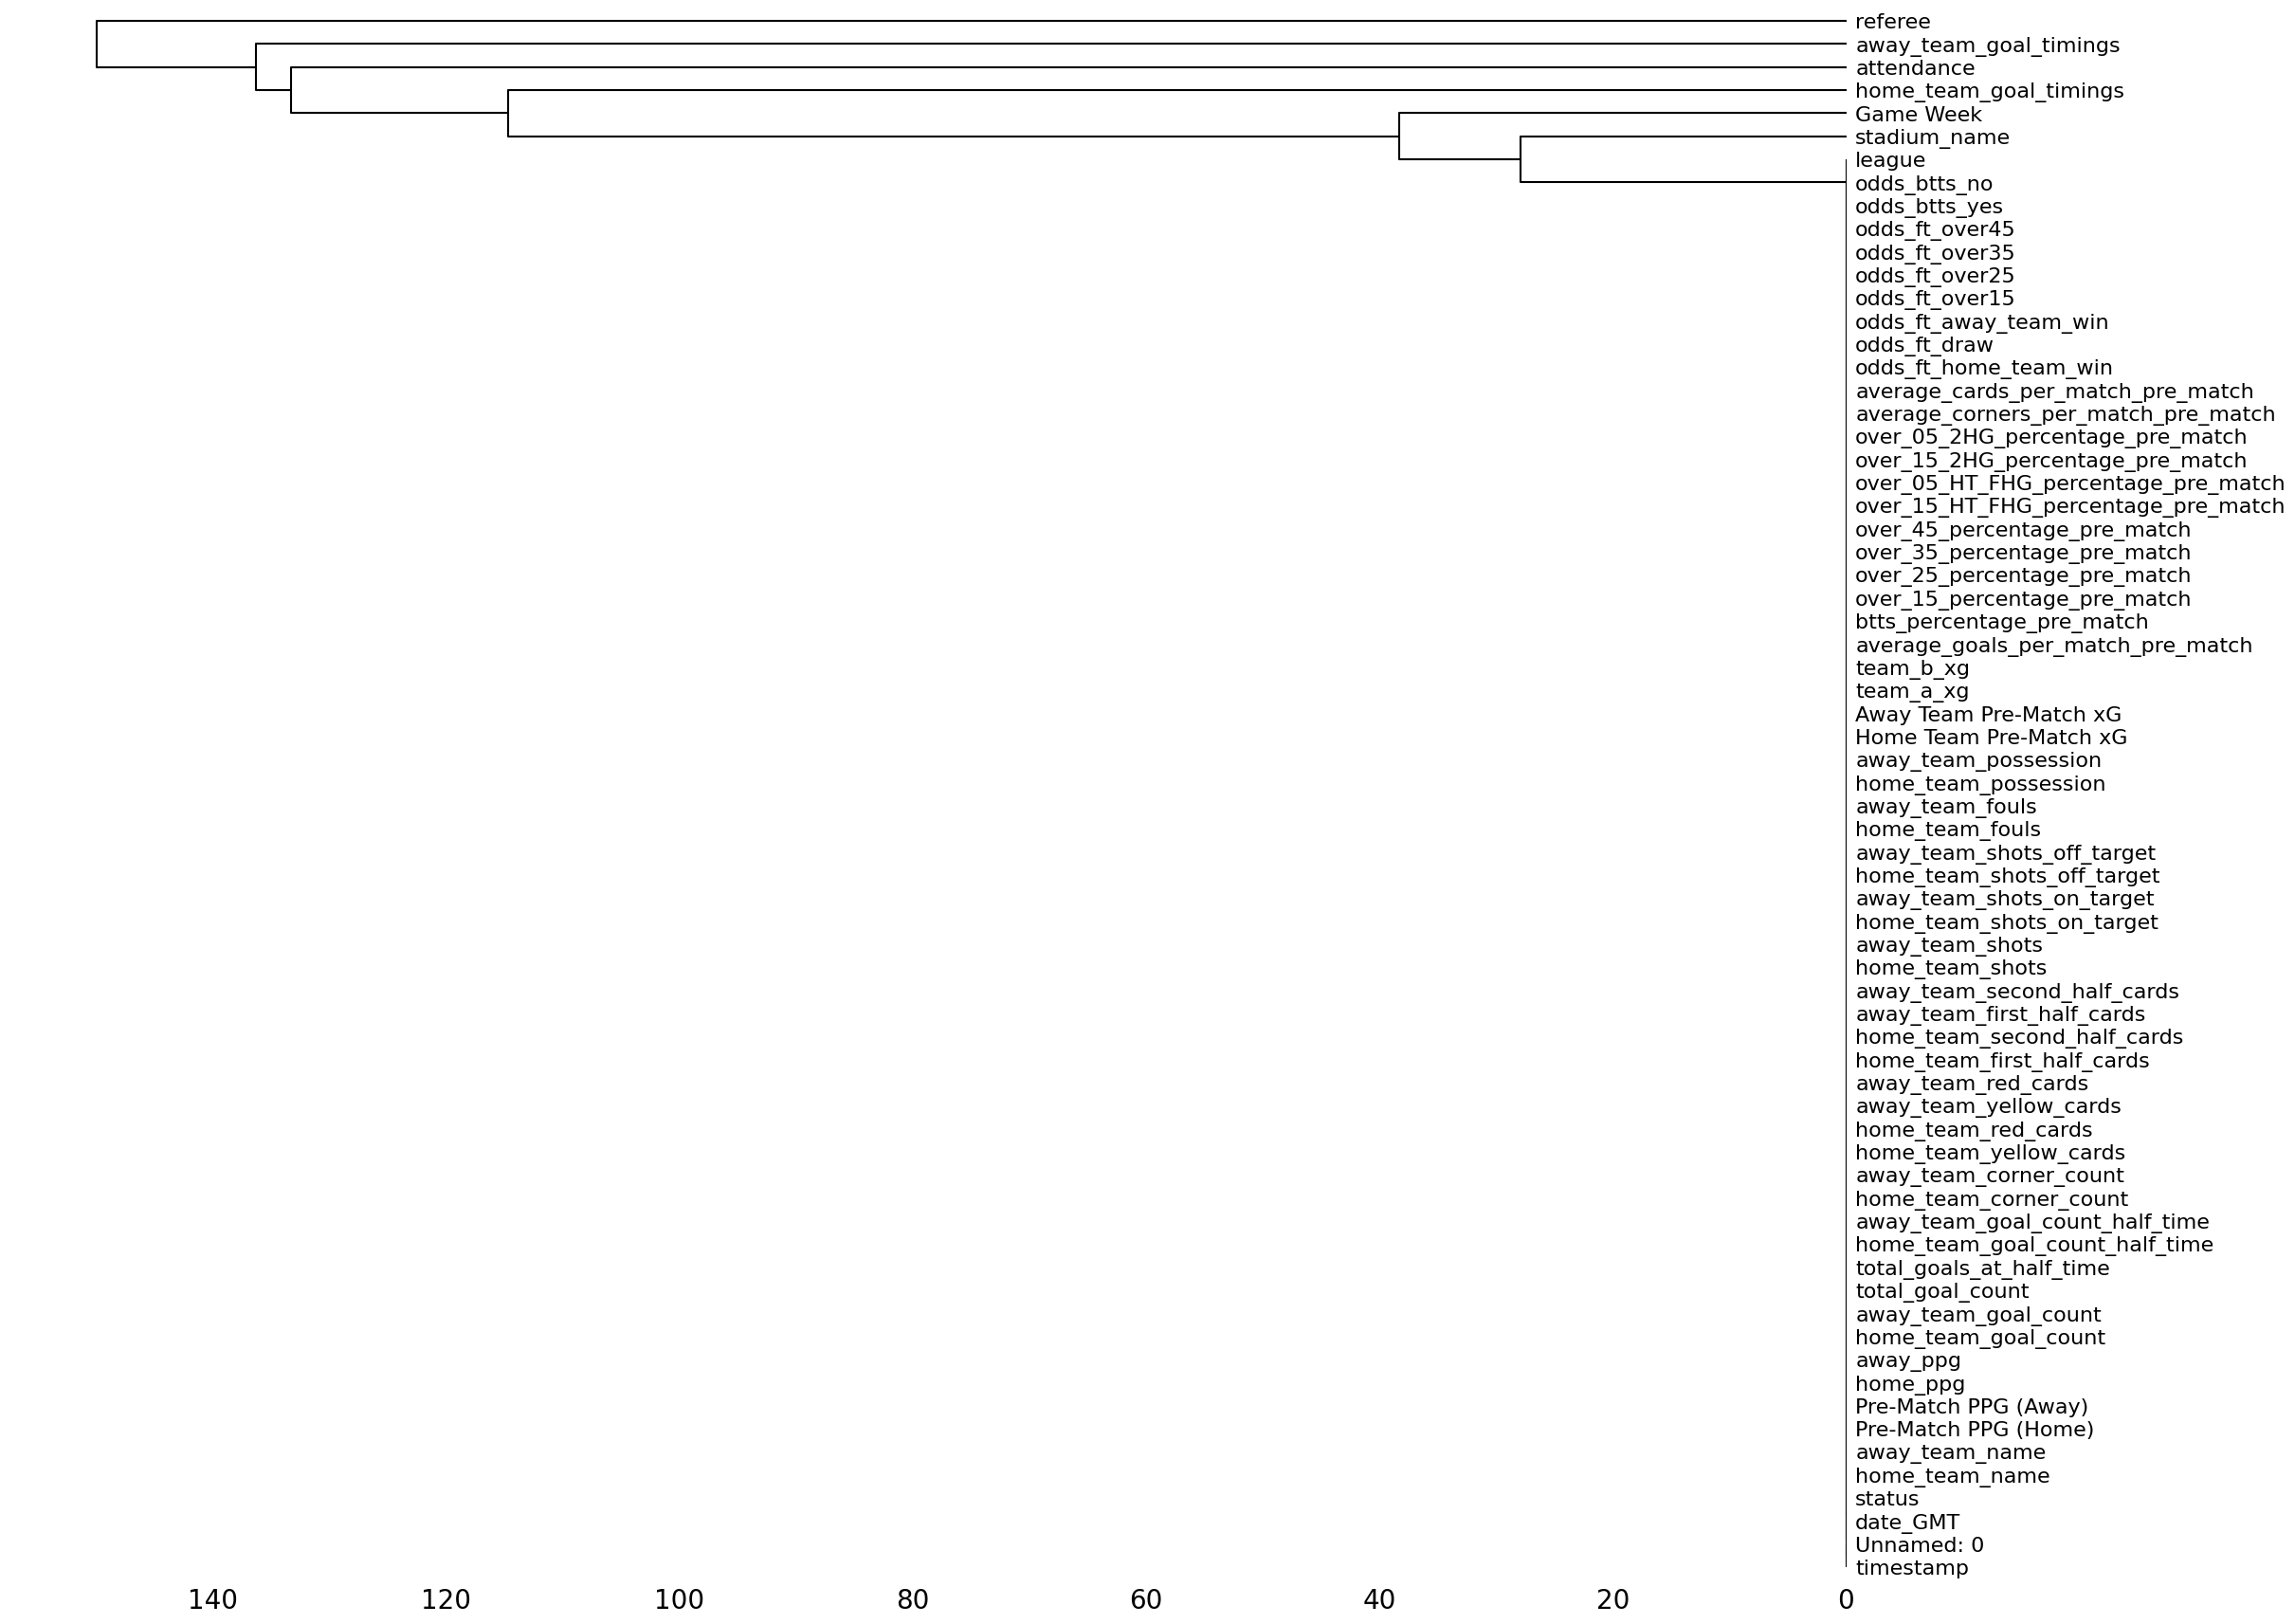

In [57]:
missingno.dendrogram(data)

# Data tidying

Simple pipeline-ish method for cleaning data.

In [58]:
def clean_data(data):
    #transforming date variable
    data['date_GMT'] = pd.to_datetime(data['date_GMT'])
    data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
    data['time'] = data['date_GMT'].dt.time
    
    #adding aggregated variables
    data['corners_total'] = data['home_team_corner_count'] + data['away_team_corner_count']
    data['yellow_cards_total'] = data['home_team_yellow_cards'] + data['away_team_yellow_cards']
    data['red_cards_total'] = data['home_team_red_cards'] + data['away_team_red_cards']
    data['cards_total'] = data['yellow_cards_total'] + data['red_cards_total']
    data['shots_total'] = data['home_team_shots'] + data['away_team_shots']
    data['shots_on_target_total'] = data['home_team_shots_on_target'] + data['away_team_shots_on_target']
    data['shots_off_target_total'] = data['home_team_shots_off_target'] + data['away_team_shots_off_target']
    data['fouls_total'] = data['home_team_fouls'] + data['away_team_fouls']
    
    #getting stadium names without city in brackets
    # data['base_name'] = data['stadium_name'].str.replace(r" \(.*\)$", "", regex=True)

    # city_map = data[data['stadium_name'].str.contains(r"\(.*\)")].copy()
    # city_map['city'] = city_map['stadium_name'].str.extract(r"\((.*?)\)")[0]
    # city_map = city_map.groupby('base_name')['city'].agg(pd.Series.mode).to_dict()

    # #filling stadium names without city in brackets
    # data['normalized_stadium'] = data.apply(lambda row: f"{row['base_name']} ({city_map.get(row['base_name'], 'Unknown')})" if '(' not in row['stadium_name'] else row['stadium_name'], axis=1)

    #dropping unnecessary features
    data.drop(['Unnamed: 0', 'timestamp', 'status', 'home_team_goal_timings', 'away_team_goal_timings', 'date_GMT'], axis=1, inplace=True)
    
    #setting one of the target variable - result of the game
    data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))
    
    def assign_season(date):
        year = date.year
        if date.month >= 8:  # Sezon zaczyna się w sierpniu
            return f'{str(year)[2:]}/{str(year+1)[2:]}'
        else:
            return f'{str(year-1)[2:]}/{str(year)[2:]}'
    
    data['season'] = data['date'].apply(assign_season)
    
    return data

In [59]:
data = clean_data(data)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\694537563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_GMT'] = pd.to_datetime(data['date_GMT'])


In [ ]:
"""
flow do czyszczenia danych:
- wstawienie braków (tyle ile możliwe): średnia frekwencja w sezonie według stadionu, uzupełnienie numeru kolejki, normalizacja nazw stadionów i pytanie co z sędziami
"""

In [60]:
data.shape

(56249, 74)

In [61]:
data_clean = data[~(data == -1).any(axis=1)]

In [62]:
data_clean.shape

(45431, 74)

In [63]:
data_clean.sort_values(by='season')

,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league,date,time,corners_total,yellow_cards_total,red_cards_total,cards_total,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,result,season
33532,12562.0,Auxerre,Sochaux,Ruddy Buquet,1.0,0.00,0.00,2.00,0.84,0,1,1,1,0,1,6,10,0,0,2,1,0,0,0,3,15,17,3,5,12,12,17,10,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stade de l'Abbé Deschamps (Auxerre),ligue 1,2009-08-08,19:00:00,16,2,1,3,32,8,24,27,2,09/10
306,NaN,Bayern München,Wolfsburg,Thorsten Kinhöfer,1.0,0.00,0.00,2.41,1.00,2,1,3,1,1,0,9,3,1,0,3,0,1,0,1,2,18,12,6,6,12,6,6,25,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Allianz Arena (München),bundesliga,2010-08-20,18:30:00,12,4,0,4,30,12,18,31,1,10/11
48332,NaN,Bari 1908,Juventus,Luca Banti,1.0,0.00,0.00,0.63,1.47,1,0,1,1,1,0,7,4,1,0,2,0,0,1,1,1,21,19,6,3,15,16,14,12,58,42,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stadio Comunale San Nicola (Bari),serie a,2010-08-29,16:00:00,11,3,0,3,40,9,31,26,1,10/11
48331,NaN,Roma,Cesena,Gabriele Gava,1.0,0.00,0.00,2.00,0.89,0,0,0,0,0,0,10,8,3,0,3,0,0,3,0,3,25,14,6,4,19,10,11,17,64,36,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stadio Olimpico (Roma),serie a,2010-08-28,18:45:00,18,6,0,6,39,10,29,28,0,10/11
48330,NaN,Udinese,Genoa,Gianluca Rocchi,1.0,0.00,0.00,1.95,0.95,0,1,1,0,0,0,9,3,2,0,3,0,0,2,3,0,15,10,7,5,8,5,12,15,47,53,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Bluenergy Stadium (Udine),serie a,2010-08-28,16:00:00,12,5,0,5,25,12,13,27,2,10/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33385,NaN,FC Arouca,Benfica,Rui Manuel Gomes Costa,18.0,1.78,2.44,1.88,2.41,0,3,3,1,0,1,3,3,3,0,1,0,0,3,0,1,8,7,0,4,8,3,10,11,39,61,1.42,1.84,0.59,1.28,2.61,22,62,50,28,17,44,67,33,84,11.78,5.66,8.50,5.20,1.30,1.20,1.61,2.60,4.50,1.95,1.73,Estádio Municipal de Arouca (Arouca),liga nos,2023-01-31,21:15:00,6,4,0,4,15,4,11,21,2,22/23
33384,NaN,Paços de Ferreira,Gil Vicente,NaN,18.0,0.20,0.88,0.65,0.76,2,1,3,1,1,0,11,12,2,0,2,0,0,2,1,1,21,14,7,6,14,8,14,12,39,61,1.60,1.43,1.99,1.76,2.77,58,78,58,37,5,29,74,55,67,10.75,5.50,2.85,3.15,2.43,1.38,2.14,3.80,7.75,1.95,1.80,Estádio da Capital do Móvel (Paços de Ferreira),liga nos,2023-01-31,19:00:00,23,4,0,4,35,13,22,

In [64]:
data_clean.isna().sum()

attendance                             14012
home_team_name                             0
away_team_name                             0
referee                                18793
Game Week                                130
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_corner_count                     0
away_team_corner_count                     0
home_team_yellow_cards                     0
home_team_red_cards                        0
away_team_yellow_cards                     0
away_team_red_cards                        0
home_team_first_half_cards                 0
home_team_

In [66]:
# Pierwsze wypełnienie: średnia dla gospodarza i sezonu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['home_team_name', 'season'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\550212674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['home_team_name', 'season'])['attendance'].transform('mean'))


In [68]:
data_clean['attendance'].isna().sum()

7111

In [70]:
# Drugie wypełnienie: średnia dla ligi i sezonu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league', 'season'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2624684561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league', 'season'])['attendance'].transform('mean'))


In [71]:
data_clean['attendance'].isna().sum()

3788

In [75]:
# Trzecie wypełnienie: średnia dla ligi na przestzeni całego datasetu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2803264831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league'])['attendance'].transform('mean'))


In [76]:
data_clean['attendance'].isna().sum()

0

In [77]:
data_clean.isna().sum()

attendance                                 0
home_team_name                             0
away_team_name                             0
referee                                18793
Game Week                                130
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_corner_count                     0
away_team_corner_count                     0
home_team_yellow_cards                     0
home_team_red_cards                        0
away_team_yellow_cards                     0
away_team_red_cards                        0
home_team_first_half_cards                 0
home_team_

In [79]:
data = data_clean

In [82]:
data.dtypes

attendance                                    float64
home_team_name                                 object
away_team_name                                 object
referee                                        object
Game Week                                     float64
Pre-Match PPG (Home)                          float64
Pre-Match PPG (Away)                          float64
home_ppg                                      float64
away_ppg                                      float64
home_team_goal_count                            int64
away_team_goal_count                            int64
total_goal_count                                int64
total_goals_at_half_time                        int64
home_team_goal_count_half_time                  int64
away_team_goal_count_half_time                  int64
home_team_corner_count                          int64
away_team_corner_count                          int64
home_team_yellow_cards                          int64
home_team_red_cards         

In [84]:
data[['home_team_name', 'away_team_name', 'referee', 'Game Week', 'stadium_name', 'league', 'result', 'season']] = \
        data[['home_team_name', 'away_team_name', 'referee', 'Game Week', 'stadium_name', 'league', 'result', 'season']].astype('category')

# EDA

In [ ]:
# attendance barplots by season

In [ ]:
"""to do's:
- przedstawienie typów i rozkładów zmiennych
- skośność i kurtoza
- braki danych
- stabilność zmiennych i stabilność braków danych
- korelacje między zmiennymi
- testy statystyczne między grupami (t-student, ks, psi, mannwhitneyu)
- barploty, boxploty, kdeploty"""

In [86]:
correlation_matrix = data.select_dtypes(include='number').corr()

<Axes: >

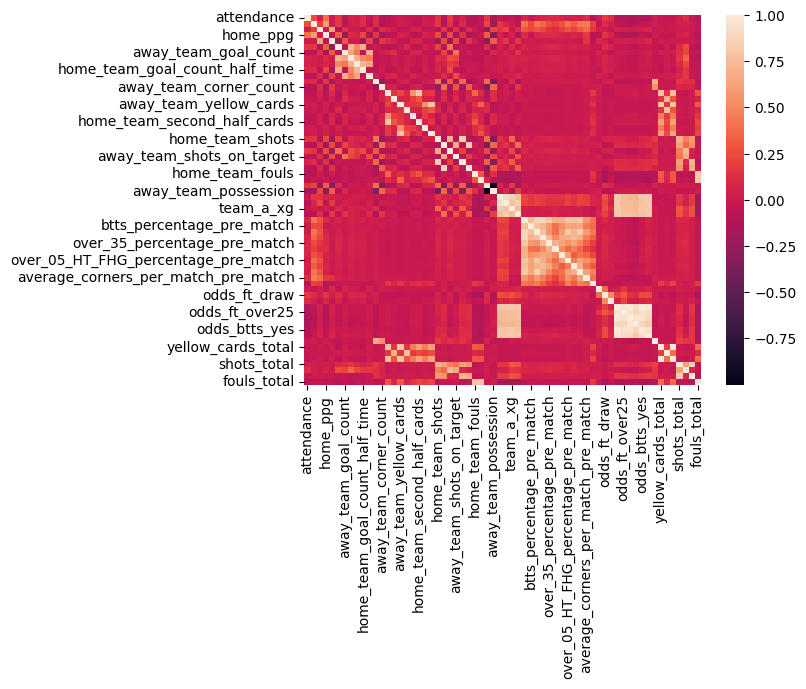

In [87]:
sns.heatmap(correlation_matrix)

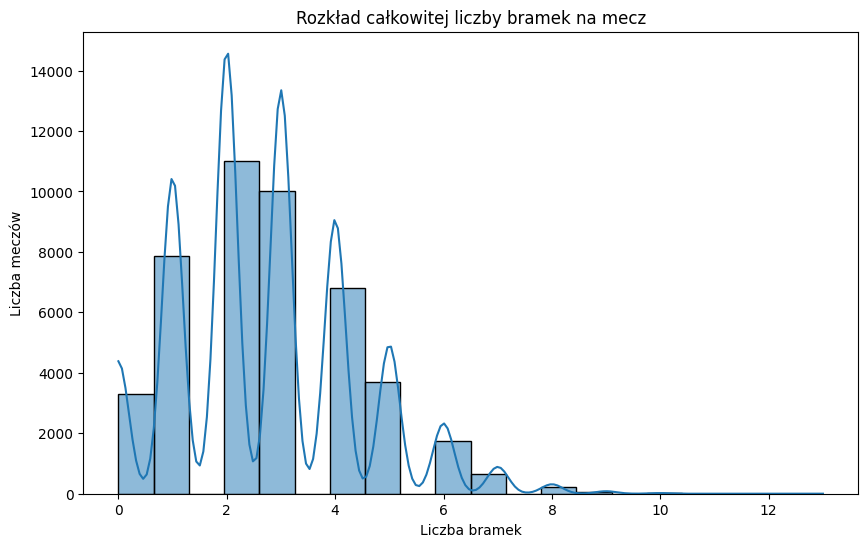

In [90]:
# Histogram liczby bramek
plt.figure(figsize=(10, 6))
sns.histplot(data['total_goal_count'], bins=20, kde=True)
plt.title('Rozkład całkowitej liczby bramek na mecz')
plt.xlabel('Liczba bramek')
plt.ylabel('Liczba meczów')
plt.show()

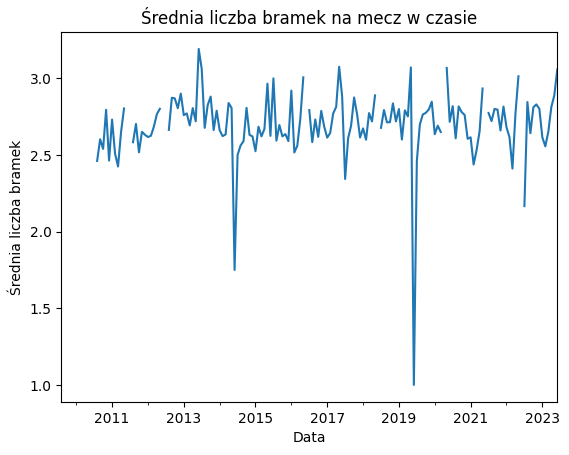

In [91]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.resample('M')['total_goal_count'].mean().plot()
plt.title('Średnia liczba bramek na mecz w czasie')
plt.ylabel('Średnia liczba bramek')
plt.xlabel('Data')
plt.show()

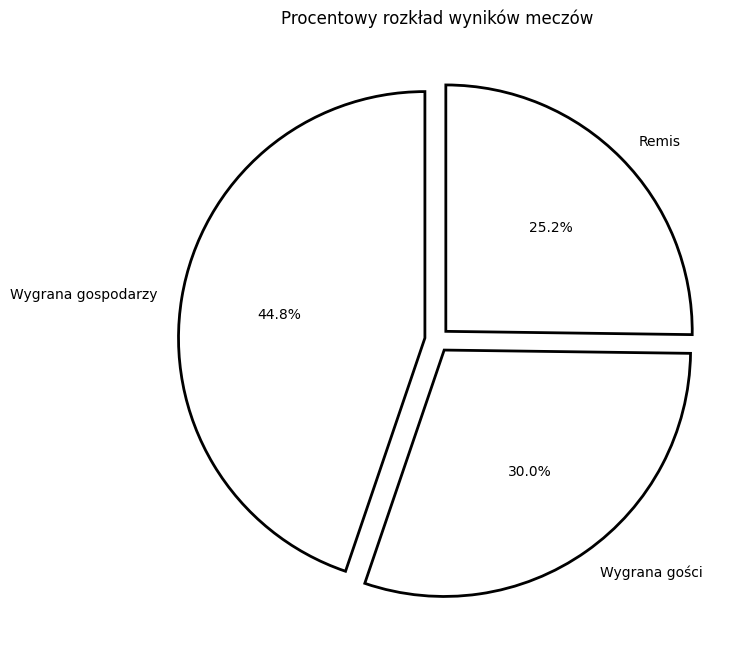

In [101]:
result_labels = data['result'].map({1: 'Wygrana gospodarzy', 0: 'Remis', 2: 'Wygrana gości'})
result_counts = result_labels.value_counts(normalize=True)
colors = ['#ff9999','#66b3ff','#99ff99']

explode = (0.05, 0.05, 0.05)  # 'explode' wyróżnia segmenty na wykresie

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, 
        explode=explode, wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': '-', 'antialiased': True, 'fill': False})
plt.title('Procentowy rozkład wyników meczów')
plt.show()

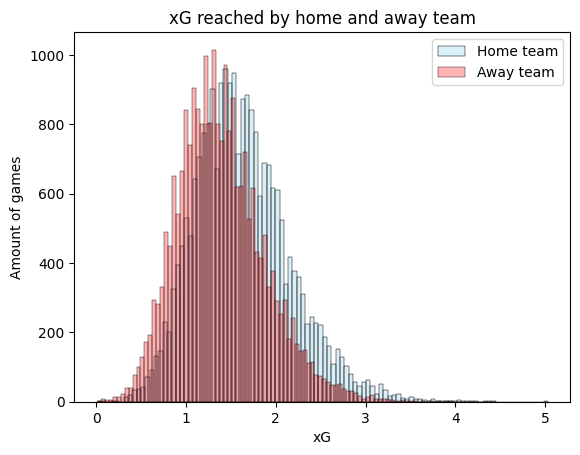

In [95]:
sns.histplot(data[data['team_a_xg'] != 0]['team_a_xg'], color='skyblue', alpha=.3)
sns.histplot(data[data['team_b_xg'] != 0]['team_b_xg'], color='red', alpha=.3)
plt.xlabel('xG')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('xG reached by home and away team')
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2544645493.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2544645493.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \


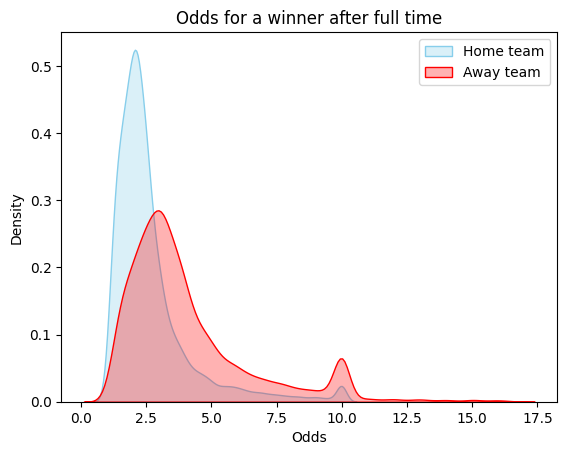

In [96]:
data['odds_ft_home_team_win'].value_counts()

sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
                            ['odds_ft_home_team_win'], color='skyblue', alpha=.3, shade=True)
sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \
                            ['odds_ft_away_team_win'], color='red', alpha=.3, shade=True)
plt.xlabel('Odds')
plt.legend(['Home team', 'Away team'])
plt.title('Odds for a winner after full time')
plt.show()

## Average game stats in every league

In [120]:
data.groupby('league')[['shots_total', 'shots_on_target_total', 'shots_off_target_total', 'fouls_total', 'yellow_cards_total', 'red_cards_total', 'corners_total']].mean()

,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,yellow_cards_total,red_cards_total,corners_total
league,,,,,,,
bundesliga,24.492067,11.783934,12.708134,27.809116,3.661043,0.157139,9.655251
czech first league,21.118884,10.012535,11.106349,28.674484,4.009300,0.183987,10.551152
ekstraklasa,22.691181,10.343548,12.347634,27.769833,4.072182,0.185904,10.257746
epl championship,22.148412,9.509858,12.638554,22.267981,3.433370,0.143118,10.264695
eredivisie,25.221582,11.684147,13.537436,23.098515,3.015459,0.187936,10.298272
la liga,23.735504,10.375381,13.360122,27.193693,5.204680,0.270600,9.998983
liga nos,23.328319,10.080127,13.248192,30.984380,5.142609,0.351172,10.627423
ligue 1,22.980737,10.050331,12.930406,26.556752,3.592585,0.256835,9.583886
premier league,23.202732,10.519530,12.683202,21.046250,3.341960,0.126048,10.513300


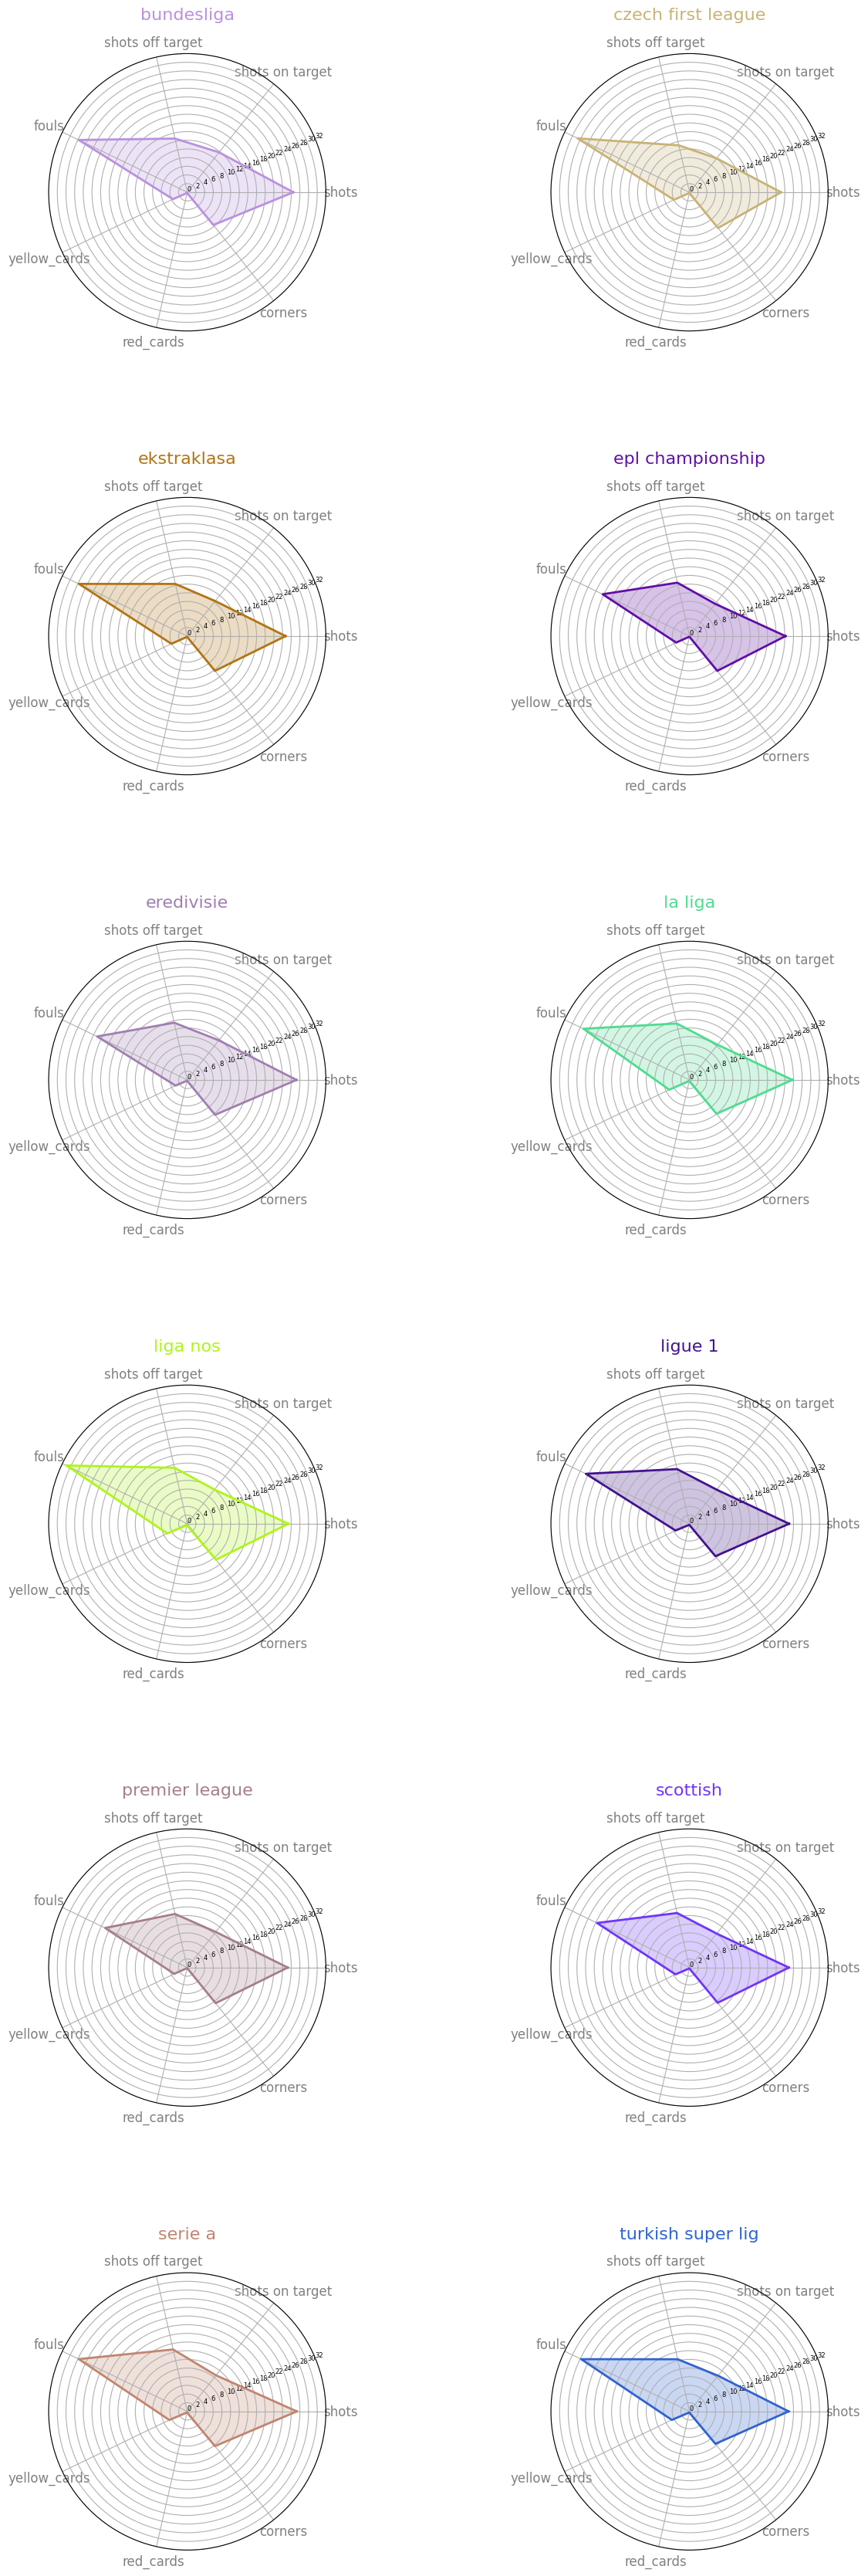

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

grouped = data.groupby('league')[['shots_total', 'shots_on_target_total', 'shots_off_target_total', 'fouls_total', 'yellow_cards_total', 'red_cards_total', 'corners_total']].mean()
labels=np.array(['shots', 'shots on target', 'shots off target', 'fouls', 'yellow_cards', 'red_cards', 'corners'])
num_vars = len(labels)

num_leagues = grouped.shape[0]

num_cols = 2
num_rows = (num_leagues + num_cols - 1) // num_cols  # Zaokrąglanie w górę

def random_color():
    return [random.uniform(0, 1) for _ in range(3)]

fig, axs = plt.subplots(figsize=(14, num_rows * 7), subplot_kw=dict(polar=True), nrows=num_rows, ncols=num_cols)
fig.subplots_adjust(hspace=0.6, wspace=0.5)  # Regulacja odstępów między wykresami

league_index = 0
max_val = grouped.max().max()  # Maksymalna wartość dla skalowania osi

# Zaokrąglenie max_val do najbliższej liczby parzystej w górę
max_val = int(np.ceil(max_val / 2) * 2)

# Obliczenie wartości ticków dla osi
ticks = np.arange(0, max_val + 2, 2)  # co 2 jednostki

for i, row in grouped.iterrows():
    stats = row.values.flatten().tolist()
    stats += stats[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    color = random_color()
    
    ax = axs.flat[league_index]
    ax.fill(angles, stats, color=color, alpha=0.25)
    ax.plot(angles, stats, color=color, linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='grey', size=12)
    ax.set_title(i, size=16, color=color, y=1.1)
    ax.set_ylim(0, max_val)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks, size=6)
    league_index += 1

#usunięcie pustych subplotów
if league_index < len(axs.flat):
    for idx in range(league_index, len(axs.flat)):
        fig.delaxes(axs.flat[idx])

plt.show()

In [129]:
data_clean

,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league,time,corners_total,yellow_cards_total,red_cards_total,cards_total,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,result,season
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-20,69000.000000,Bayern München,Wolfsburg,Thorsten Kinhöfer,1.0,0.00,0.00,2.41,1.00,2,1,3,1,1,0,9,3,1,0,3,0,1,0,1,2,18,12,6,6,12,6,6,25,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Allianz Arena (München),bundesliga,18:30:00,12,4,0,4,30,12,18,31,1,10/11
2010-08-21,30150.000000,Hoffenheim,Werder Bremen,Günter Perl,1.0,0.00,0.00,1.53,1.00,4,1,5,5,4,1,5,5,1,0,2,0,0,1,1,1,11,11,8,3,3,8,24,16,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,PreZero Arena (Sinsheim),bundesliga,13:30:00,10,3,0,3,22,11,11,40,1,10/11
2010-08-21,42275.666667,Borussia M'gladbach,Nürnberg,Peter Gagelmann,1.0,0.00,0.00,1.06,1.06,1,1,2,2,1,1,6,5,0,0,1,0,0,0,0,1,13,11,6,6,7,5,15,18,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Stadion im BORUSSIA-PARK (Mönchengladbach),bundesliga,13:30:00,11,1,0,1,24,12,12,33,0,10/11
2010-08-21,48333.333333,Köln,Kaiserslautern,Felix Brych,1.0,0.00,0.00,2.06,1.29,1,3,4,1,1,0,5,6,1,1,2,0,1,1,1,1,11,18,5,7,6,11,10,25,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,RheinEnergieStadion (Köln),bundesliga,13:30:00,11,3,1,4,29,12,17,35,2,10/11
2010-08-21,23200.000000,Freiburg,St. Pauli,Jochen Drees,1.0,0.00,0.00,1.53,0.82,1,3,4,0,0,0,3,6,0,0,0,0,0,0,0,0,10,18,4,7,6,11,12,13,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Schwarzwald-Stadion (Freiburg im Breisgau),bundesliga,13:30:00,9,0,0,0,28,11,17,25,2,10/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,20967.713115,İstanbul Başakşehir,Trabzonspor,Bahattin Şimşek,38.0,2.06,1.00,2.11,0.94,3,1,4,1,1,0,3,5,0,0,0,0,0,0,0,0,9,13,7,6,2,7,6,10,63,37,1.62,1.78,1.44,1.61,3.15,48,91,59,33,21,33,77,47,85,9.67,5.48,2.70,3.20,2.3,1.24,1.73,2.87,5.30,1.57,2.34,Başakşehir Fatih Terim Stadyumu (İstanbul),turkish super lig,17:00:00,8,0,0,0,22,13,9,16,1,22/23
2023-06-07,20967.713115,Giresunspor,Antalyaspor,Kadir Sağlam,38.0,1.12,0.82,1.22,0.78,2,0,2,1,1,0,3,11,2,1,1,0,1,2,1,0,6,17,4,6,2,11,13,12,31,69,1.80,1.29,0.91,2.09,2.77,50,71

In [133]:
data_clean.head()

,attendance,home_team_name,away_team_name,referee,game week,pre-match ppg (home),pre-match ppg (away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,home team pre-match xg,away team pre-match xg,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_ht_fhg_percentage_pre_match,over_05_ht_fhg_percentage_pre_match,over_15_2hg_percentage_pre_match,over_05_2hg_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league,time,corners_total,yellow_cards_total,red_cards_total,cards_total,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,result,season
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-20,69000.000000,Bayern München,Wolfsburg,Thorsten Kinhöfer,1.0,0.0,0.0,2.41,1.00,2,1,3,1,1,0,9,3,1,0,3,0,1,0,1,2,18,12,6,6,12,6,6,25,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Allianz Arena (München),bundesliga,18:30:00,12,4,0,4,30,12,18,31,1,10/11
2010-08-21,30150.000000,Hoffenheim,Werder Bremen,Günter Perl,1.0,0.0,0.0,1.53,1.00,4,1,5,5,4,1,5,5,1,0,2,0,0,1,1,1,11,11,8,3,3,8,24,16,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PreZero Arena (Sinsheim),bundesliga,13:30:00,10,3,0,3,22,11,11,40,1,10/11
2010-08-21,42275.666667,Borussia M'gladbach,Nürnberg,Peter Gagelmann,1.0,0.0,0.0,1.06,1.06,1,1,2,2,1,1,6,5,0,0,1,0,0,0,0,1,13,11,6,6,7,5,15,18,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stadion im BORUSSIA-PARK (Mönchengladbach),bundesliga,13:30:00,11,1,0,1,24,12,12,33,0,10/11
2010-08-21,48333.333333,Köln,Kaiserslautern,Felix Brych,1.0,0.0,0.0,2.06,1.29,1,3,4,1,1,0,5,6,1,1,2,0,1,1,1,1,11,18,5,7,6,11,10,25,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RheinEnergieStadion (Köln),bundesliga,13:30:00,11,3,1,4,29,12,17,35,2,10/11
2010-08-21,23200.000000,Freiburg,St. Pauli,Jochen Drees,1.0,0.0,0.0,1.53,0.82,1,3,4,0,0,0,3,6,0,0,0,0,0,0,0,0,10,18,4,7,6,11,12,13,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Schwarzwald-Stadion (Freiburg im Breisgau),bundesliga,13:30:00,9,0,0,0,28,11,17,25,2,10/11


In [132]:
data_clean.columns = [x.lower() for x in data_clean.columns]

In [134]:
data_clean.columns

Index(['attendance', 'home_team_name', 'away_team_name', 'referee',
       'game week', 'pre-match ppg (home)', 'pre-match ppg (away)', 'home_ppg',
       'away_ppg', 'home_team_goal_count', 'away_team_goal_count',
       'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'home team pre-match xg', 'away team pre-match xg', 'team_a_xg',
      

In [138]:
model_vars = [
    'attendance',
    'home_team_name',
    'away_team_name',
    'referee',
    'game_week',
    'pre-match ppg (home)',
    'pre-match ppg (away)',
    'home_ppg',
    'away_ppg',
    'home_team_goal_count',
    'away_team_goal_count',
    'total_goal_count',
    'total_goals_at_half_time',
    'home_team_goal_count_half_time',
    'away_team_goal_count_half_time',
    'home_team_corner_count',
    'away_team_corner_count',
    'home_team_yellow_cards',
    'home_team_red_cards',
    'away_team_yellow_cards',
    'away_team_red_cards',
    'home_team_first_half_cards',
    'home_team_second_half_cards',
    'away_team_first_half_cards',
    'away_team_second_half_cards',
    'home_team_shots',
    'away_team_shots',
    'home_team_shots_on_target',
    'away_team_shots_on_target',
    'home_team_shots_off_target',
    'away_team_shots_off_target',
    'home_team_fouls',
    'away_team_fouls',
    'home_team_possession',
    'away_team_possession',
    'home team pre-match xg',
    'away team pre-match xg',
    'team_a_xg',
    'team_b_xg',
    'average_goals_per_match_pre_match',
    'btts_percentage_pre_match',
    'average_corners_per_match_pre_match',
    'average_cards_per_match_pre_match',
    'stadium_name',
    'league',
    'time'
]

In [139]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45431 entries, 2010-08-20 to 2023-06-07
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   attendance                           45431 non-null  float64
 1   home_team_name                       45431 non-null  object 
 2   away_team_name                       45431 non-null  object 
 3   referee                              26638 non-null  object 
 4   game week                            45301 non-null  object 
 5   pre-match ppg (home)                 45431 non-null  float64
 6   pre-match ppg (away)                 45431 non-null  float64
 7   home_ppg                             45431 non-null  float64
 8   away_ppg                             45431 non-null  float64
 9   home_team_goal_count                 45431 non-null  int64  
 10  away_team_goal_count                 45431 non-null  int64  
 11  total_goal_

# Modelling

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [141]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Reshape, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class FootballMatchPredictor:
    def __init__(self, num_teams, embedding_dim=20, lstm_units=64, dense_units=128):
        self.num_teams = num_teams
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.model = self.build_model()

    def build_model(self):
        # Wejścia
        home_input = Input(shape=(5,), name='home_input')
        away_input = Input(shape=(5,), name='away_input')
        home_team_input = Input(shape=(1,), dtype='int32', name='home_team_input')
        away_team_input = Input(shape=(1,), dtype='int32', name='away_team_input')

        # Warstwy embedding
        team_embedding = Embedding(input_dim=self.num_teams, output_dim=self.embedding_dim, input_length=1)
        home_team_embedded = team_embedding(home_team_input)
        away_team_embedded = team_embedding(away_team_input)

        # Spłaszczenie wyników z embedding
        flatten = Flatten()
        home_team_flatten = flatten(home_team_embedded)
        away_team_flatten = flatten(away_team_embedded)

        # LSTM dla analizy formy
        reshape_layer = Reshape((5, 1))
        home_input_reshaped = reshape_layer(home_input)
        away_input_reshaped = reshape_layer(away_input)
        lstm_layer = LSTM(self.lstm_units)
        home_lstm = lstm_layer(home_input_reshaped)
        away_lstm = lstm_layer(away_input_reshaped)

        # Konkatenacja cech
        concatenated = concatenate([home_lstm, away_lstm, home_team_flatten, away_team_flatten])

        # Warstwy gęste
        x = Dense(self.dense_units, activation='relu')(concatenated)
        x = Dropout(0.5)(x)

        # Wielokrotne wyniki
        result = Dense(3, activation='softmax', name='result')(x)
        total_goals = Dense(1, activation='relu', name='total_goals')(x)
        total_cards = Dense(1, activation='relu', name='total_cards')(x)
        total_corners = Dense(1, activation='relu', name='total_corners')(x)

        # Model
        model = Model(inputs=[home_input, away_input, home_team_input, away_team_input],
                      outputs=[result, total_goals, total_cards, total_corners])
        model.compile(optimizer=Adam(),
                      loss={'result': 'categorical_crossentropy',
                            'total_goals': 'mse',
                            'total_cards': 'mse',
                            'total_corners': 'mse'},
                      metrics={'result': 'accuracy',
                               'total_goals': 'mse',
                               'total_cards': 'mse',
                               'total_corners': 'mse'})
        return model

# Modelling w/o odds

# Modelling with odds